# The distribution of the Refugee population in Morocco
> ## By Abderrahman BENYAHYA
>> ### Using UNHCR DASHBOARD for years 2016 to 2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import wptools
import seaborn as sb

In [2]:
df= pd.read_csv('ville Maroc.csv', sep=';')

In [3]:
df_2016 = df[:10]

In [4]:
df_2017 =df[10:20]

In [5]:
df_2018 = df[20:30]

In [6]:
df_2019 = df[30:]

In [7]:
df_all = pd.merge(df_2016,df_2017, on='Ville', how='left')

In [8]:
df_all = pd.merge(df_all, df_2018, on='Ville', how='left')

In [9]:
df_all= pd.merge(df_all, df_2019, on='Ville', how='left')

In [10]:
df_all.head(1)

,Ville,31/08/2016_x,09/30/2017_x,31/08/2018_x,31/08/2019_x,31/08/2016_y,09/30/2017_y,31/08/2018_y,31/08/2019_y,31/08/2016_x,09/30/2017_x,31/08/2018_x,31/08/2019_x,31/08/2016_y,09/30/2017_y,31/08/2018_y,31/08/2019_y
0,Casablanca,816.0,NaN,NaN,NaN,NaN,688,NaN,NaN,NaN,NaN,645.0,NaN,NaN,NaN,NaN,726.0


In [11]:
df_all = df_all.rename(columns={'31/08/2016_x': 'August2016', '09/30/2017_y': 'September2017', '31/08/2018_x':'August2018', '31/08/2019_y':'August2019' })

In [12]:
df_all.head(1)

,Ville,August2016,09/30/2017_x,August2018,31/08/2019_x,31/08/2016_y,September2017,31/08/2018_y,August2019,August2016,09/30/2017_x,August2018,31/08/2019_x,31/08/2016_y,September2017,31/08/2018_y,August2019
0,Casablanca,816.0,NaN,NaN,NaN,NaN,688,NaN,NaN,NaN,NaN,645.0,NaN,NaN,NaN,NaN,726.0


In [13]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 17 columns):
Ville            10 non-null object
August2016       10 non-null float64
09/30/2017_x     0 non-null object
August2018       0 non-null float64
31/08/2019_x     0 non-null float64
31/08/2016_y     0 non-null float64
September2017    9 non-null object
31/08/2018_y     0 non-null float64
August2019       0 non-null float64
August2016       0 non-null float64
09/30/2017_x     0 non-null object
August2018       8 non-null float64
31/08/2019_x     0 non-null float64
31/08/2016_y     0 non-null float64
September2017    0 non-null object
31/08/2018_y     0 non-null float64
August2019       8 non-null float64
dtypes: float64(12), object(5)
memory usage: 1.4+ KB


In [14]:
df_all = df_all.dropna(axis=1, how='all')

In [15]:
df_all

,Ville,August2016,September2017,August2018,August2019
0,Casablanca,816.0,688,645.0,726.0
1,Rabat,802.0,891,960.0,1086.0
2,Oujda,494.0,533,581.0,570.0
3,Temara,273.0,271,294.0,383.0
4,Kenitra,272.0,422,NaN,NaN
5,Tanger,268.0,235,304.0,289.0
6,Meknes,168.0,209,223.0,297.0
7,Salé,146.0,NaN,NaN,NaN
8,Others,909.0,1 216,1489.0,2074.0
9,Unknown,23.0,3,0.0,33.0


In [16]:
df_all.September2017 = df_all.September2017.str.replace(('\D+'), '')

In [17]:
df_all.September2017 = df_all.September2017.astype('float')

### The distribution of the Refugee Population in Morocan cities during the last 4 years

> #### We can see that Casablanca has different trends from other that show an augmentation of refugees

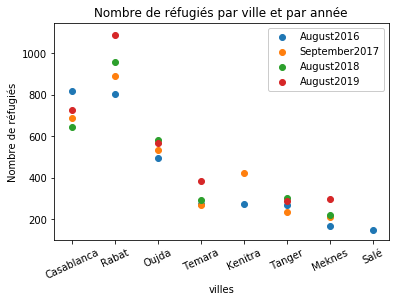

In [76]:
plt.scatter(df_all['Ville'], df_all['August2016'], label='August2016')
plt.scatter(df_all['Ville'], df_all['September2017'], label='September2017')
plt.scatter(df_all['Ville'], df_all['August2018'], label='August2018')
plt.scatter(df_all['Ville'], df_all['August2019'], label='August2019')
plt.legend(framealpha=1, frameon=True)
plt.xlabel('villes')
plt.title('Nombre de réfugiés par ville et par année')
plt.ylabel('Nombre de réfugiés')
plt.xticks(rotation=25);


In [25]:
df_list=[]
errors={}
for city in df_all['Ville']:
    try:
        page = wptools.page(city, silent=True)
        pop_total = page.get().data['infobox']['population_total']
        region = page.get().data['infobox']['subdivision_name1']
                # Append to list of dictionaries
        df_list.append({'Ville': city,
                        'Total_pop': pop_total,
                         'Region': region})
    
    # Not best practice to catch all exceptions but fine for this short script
    except Exception as e:
        print(city )
        errors[city] = None

Others
Unknown


In [26]:
df_list = pd.DataFrame(df_list)

In [27]:
df_list.head()

,Region,Total_pop,Ville
0,[[Casablanca-Settat]],3359818,Casablanca
1,[[Rabat-Salé-Kénitra]],"577,827",Rabat
2,[[Oriental (Morocco)|Oriental]],494252,Oujda
3,[[Rabat-Salé-Kénitra]],313510,Temara
4,[[Rabat-Salé-Kénitra]],431282,Kenitra


In [28]:
df_all = pd.merge(df_list, df_all, on='Ville', how='left')

In [29]:
df_all

,Region,Total_pop,Ville,August2016,September2017,August2018,August2019
0,[[Casablanca-Settat]],3359818,Casablanca,816.0,688.0,645.0,726.0
1,[[Rabat-Salé-Kénitra]],"577,827",Rabat,802.0,891.0,960.0,1086.0
2,[[Oriental (Morocco)|Oriental]],494252,Oujda,494.0,533.0,581.0,570.0
3,[[Rabat-Salé-Kénitra]],313510,Temara,273.0,271.0,294.0,383.0
4,[[Rabat-Salé-Kénitra]],431282,Kenitra,272.0,422.0,NaN,NaN
5,[[Tanger-Tetouan-Al Hoceima]],947952,Tanger,268.0,235.0,304.0,289.0
6,[[Fès-Meknès]],632079,Meknes,168.0,209.0,223.0,297.0
7,[[Rabat-Salé-Kénitra]],890403,Salé,146.0,NaN,NaN,NaN


In [30]:
df_all.Total_pop = df_all.Total_pop.str.replace(('\D+'), '')

In [31]:
df_all

,Region,Total_pop,Ville,August2016,September2017,August2018,August2019
0,[[Casablanca-Settat]],3359818,Casablanca,816.0,688.0,645.0,726.0
1,[[Rabat-Salé-Kénitra]],577827,Rabat,802.0,891.0,960.0,1086.0
2,[[Oriental (Morocco)|Oriental]],494252,Oujda,494.0,533.0,581.0,570.0
3,[[Rabat-Salé-Kénitra]],313510,Temara,273.0,271.0,294.0,383.0
4,[[Rabat-Salé-Kénitra]],431282,Kenitra,272.0,422.0,NaN,NaN
5,[[Tanger-Tetouan-Al Hoceima]],947952,Tanger,268.0,235.0,304.0,289.0
6,[[Fès-Meknès]],632079,Meknes,168.0,209.0,223.0,297.0
7,[[Rabat-Salé-Kénitra]],890403,Salé,146.0,NaN,NaN,NaN


In [32]:
df_all.to_csv('Villes_Maroccomplete.csv', index=False)

In [33]:
df_clean= pd.read_csv('Villes_Maroccomplete.csv')

In [34]:
df_clean

,Region,Total_pop,Ville,August2016,September2017,August2018,August2019
0,[[Casablanca-Settat]],3359818,Casablanca,816.0,688.0,645.0,726.0
1,[[Rabat-Salé-Kénitra]],577827,Rabat,802.0,891.0,960.0,1086.0
2,[[Oriental (Morocco)|Oriental]],494252,Oujda,494.0,533.0,581.0,570.0
3,[[Rabat-Salé-Kénitra]],313510,Temara,273.0,271.0,294.0,383.0
4,[[Rabat-Salé-Kénitra]],431282,Kenitra,272.0,422.0,NaN,NaN
5,[[Tanger-Tetouan-Al Hoceima]],947952,Tanger,268.0,235.0,304.0,289.0
6,[[Fès-Meknès]],632079,Meknes,168.0,209.0,223.0,297.0
7,[[Rabat-Salé-Kénitra]],890403,Salé,146.0,NaN,NaN,NaN


In [35]:
page = wptools.page('Rabat', silent=True)
pop_total = page.get().data['infobox']['population_total']
Coordinates = page.get().data['infobox']['coordinates']

In [37]:
from geopy.geocoders import Nominatim
df_list =[]
errors={}
for city in df_clean['Ville']:
    try:
        geolocator = Nominatim(user_agent="OpenStreetMap Web Site")
        location = geolocator.geocode(city)
        df_list.append({'Ville': city,
                        'lat': location.latitude,
                         'lon': location.longitude,
                       })
    
    # Not best practice to catch all exceptions but fine for this short script
    except Exception as e:
        print(city )
        errors[city] = None



In [38]:
df_list = pd.DataFrame(df_list)

In [39]:
df_list

,Ville,lat,lon
0,Casablanca,33.595063,-7.618777
1,Rabat,34.022405,-6.834543
2,Oujda,34.677874,-1.929306
3,Temara,33.922468,-6.913341
4,Kenitra,34.264570,-6.570169
5,Tanger,35.764231,-5.818626
6,Meknes,33.897812,-5.531984
7,Salé,34.015678,-6.756799


In [40]:
import geoplotlib

In [42]:
df_clean = pd.merge(df_clean, df_list, on='Ville', how='left')

In [43]:
df_clean

,Region,Total_pop,Ville,August2016,September2017,August2018,August2019,lat,lon
0,[[Casablanca-Settat]],3359818,Casablanca,816.0,688.0,645.0,726.0,33.595063,-7.618777
1,[[Rabat-Salé-Kénitra]],577827,Rabat,802.0,891.0,960.0,1086.0,34.022405,-6.834543
2,[[Oriental (Morocco)|Oriental]],494252,Oujda,494.0,533.0,581.0,570.0,34.677874,-1.929306
3,[[Rabat-Salé-Kénitra]],313510,Temara,273.0,271.0,294.0,383.0,33.922468,-6.913341
4,[[Rabat-Salé-Kénitra]],431282,Kenitra,272.0,422.0,NaN,NaN,34.264570,-6.570169
5,[[Tanger-Tetouan-Al Hoceima]],947952,Tanger,268.0,235.0,304.0,289.0,35.764231,-5.818626
6,[[Fès-Meknès]],632079,Meknes,168.0,209.0,223.0,297.0,33.897812,-5.531984
7,[[Rabat-Salé-Kénitra]],890403,Salé,146.0,NaN,NaN,NaN,34.015678,-6.756799


In [44]:
df_clean.to_csv('Villes_Maroccomplete.csv', index=False)

In [45]:
df_clean= pd.read_csv('Villes_Maroccomplete.csv')

In [49]:
region = df_clean.groupby('Region').sum()

In [59]:
region['prop_refugies']= region['August2019'] / region['Total_pop'] *100

### Proportion of refugees in the regions
> #### It is clear that the Region of Oriental who get more refugees in proportion

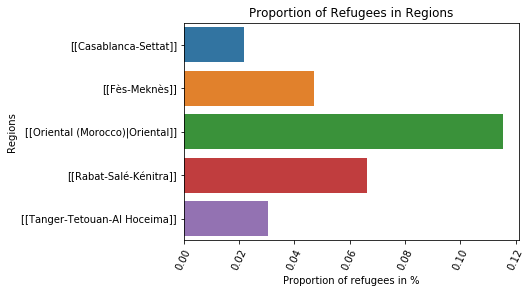

In [73]:
sb.barplot(y=region.index,x=region['prop_refugies'])
plt.xticks(rotation=65);
plt.title('Proportion of Refugees in Regions')
plt.xlabel('Proportion of refugees in %')
plt.ylabel('Regions');

### The distribution of Refugees in the Regions during the last 4 years
> #### The distribution by regions shows different trends: the region of Fes shows an increase in 2019 

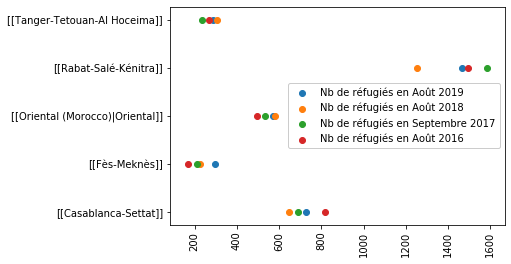

In [72]:
plt.scatter(y=region.index, x=region['August2019'], label='Nb de réfugiés en Août 2019')
plt.scatter(y=region.index, x=region['August2018'], label='Nb de réfugiés en Août 2018')
plt.scatter(y=region.index, x=region['September2017'], label='Nb de réfugiés en Septembre 2017')
plt.scatter(y=region.index, x=region['August2016'], label='Nb de réfugiés en Août 2016');
plt.legend(framealpha=1, frameon=True)
plt.xticks(rotation=90);